### Density Plot for 2019, 2021 & 2023

In [1]:
#importing libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.patches as patches
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap, BoundaryNorm


# Load datasets
data_2019 = pd.read_csv("cleaned_2019_data.csv", low_memory=False) #showed a warning and recommended to add condition.
data_2021 = pd.read_csv("cleaned_2021_data.csv")
data_2023 = pd.read_csv("cleaned_2023_data.csv")

# Load borough shapefile
#boroughs = gpd.read_file("\statistical-gis-boundaries-london\ESRI\London_Borough_Excluding_MHW.shp")
boroughs = gpd.read_file(r"statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")

# Reproject boroughs to British National Grid (EPSG:27700)
boroughs = boroughs.to_crs(epsg=27700)

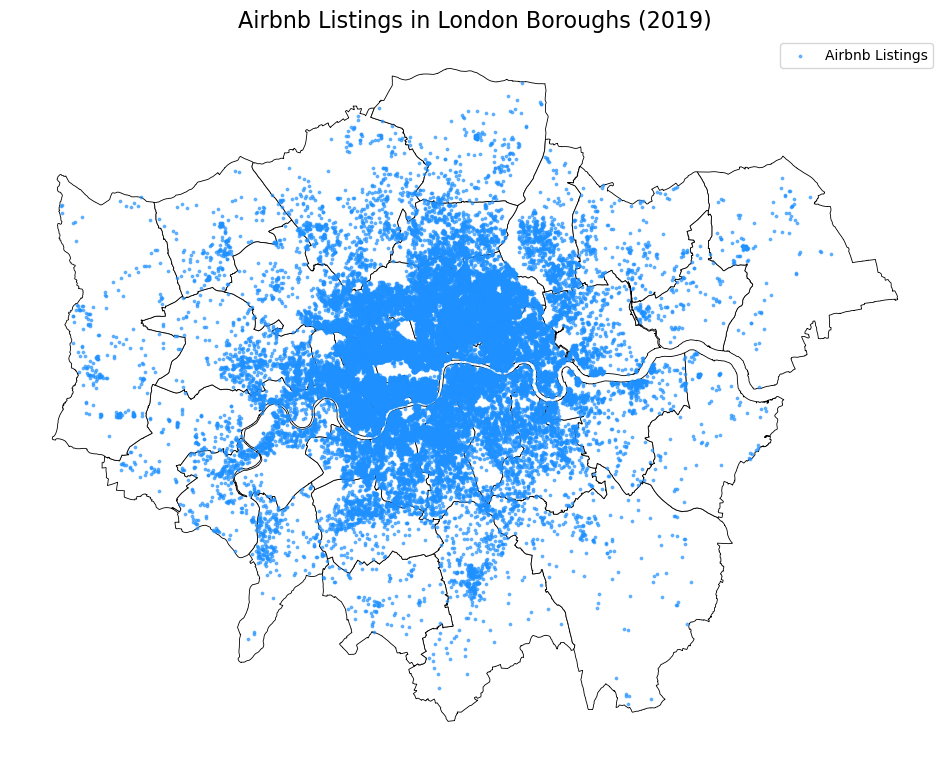

In [2]:
#filtering and plotting dataset for 2019

# Filter for "Entire home/apt"
data_2019 = data_2019[data_2019['room_class'] == 'Entire home/apt']

# Convert Airbnb data to GeoDataFrame
geometry = [Point(xy) for xy in zip(data_2019['longitude'], data_2019['latitude'])]
airbnb_gdf = gpd.GeoDataFrame(data_2019, geometry=geometry, crs="EPSG:4326")

# Reproject Airbnb data to British National Grid (EPSG:27700)
airbnb_gdf = airbnb_gdf.to_crs(epsg=27700)

# Spatial subsetting: Filter Airbnb listings that intersect boroughs
airbnb_in_boroughs_2019 = airbnb_gdf[airbnb_gdf.geometry.apply(lambda x: boroughs.geometry.intersects(x).any())]

# Plot borough boundaries as the base map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot borough boundaries
boroughs.plot(
    ax=ax,
    color="white",  # Base color for boroughs
    edgecolor="black",  # Boundary color
    linewidth=0.6
)

# Plot Airbnb listings
airbnb_in_boroughs_2019.plot(
    ax=ax,
    markersize=3,  # Size of the points
     color= "#1E90FF",  # Dodger Blue # Airbnb points color
    alpha=0.6,  # Transparency of points
    label="Airbnb Listings"
)

# Add title and legend
ax.set_title("Airbnb Listings in London Boroughs (2019)", fontsize=16)
ax.legend()

# Remove axes
ax.axis("off")

# Show the map
plt.savefig("plot1.png", dpi=300, bbox_inches="tight")
plt.show()

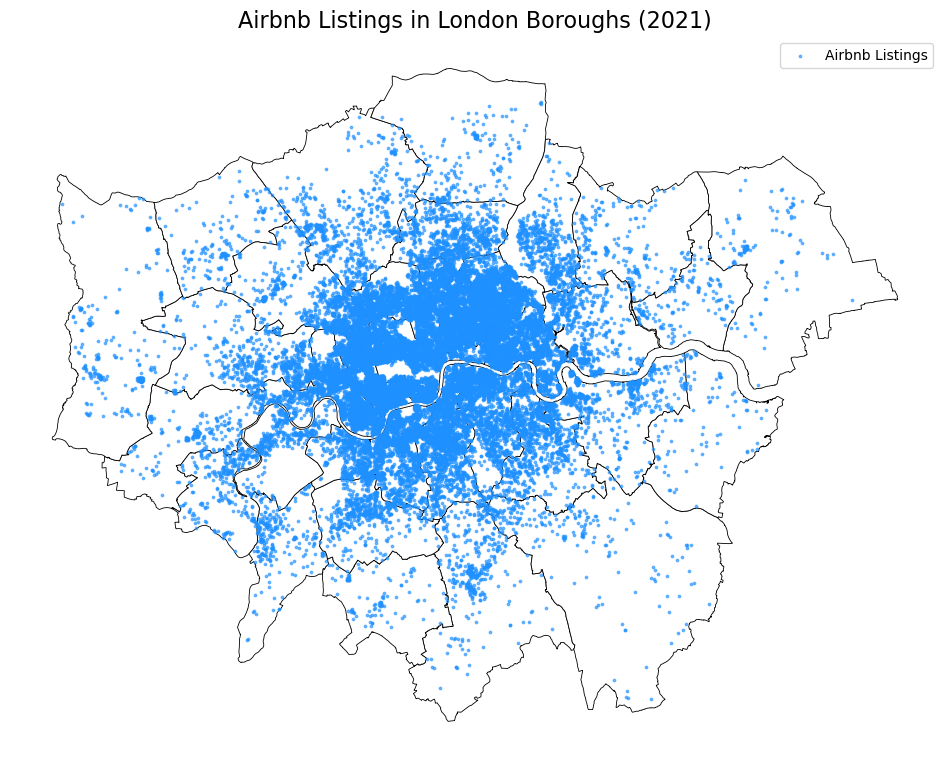

In [3]:
#filtering and plotting dataset for 2021

# Filter for "Entire home/apt"
data_2021 = data_2021[data_2021['room_type'] == 'Entire home/apt']

# Convert Airbnb data to GeoDataFrame
geometry = [Point(xy) for xy in zip(data_2021['longitude'], data_2021['latitude'])]
airbnb_gdf = gpd.GeoDataFrame(data_2021, geometry=geometry, crs="EPSG:4326")

# Reproject Airbnb data to British National Grid (EPSG:27700)
airbnb_gdf = airbnb_gdf.to_crs(epsg=27700)

# Spatial subsetting: Filter Airbnb listings that intersect boroughs
airbnb_in_boroughs_2021 = airbnb_gdf[airbnb_gdf.geometry.apply(lambda x: boroughs.geometry.intersects(x).any())]

# Plot borough boundaries as the base map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot borough boundaries
boroughs.plot(
    ax=ax,
    color="white",  # Base color for boroughs
    edgecolor="black",  # Boundary color
    linewidth=0.6
)

# Plot Airbnb listings
airbnb_in_boroughs_2021.plot(
    ax=ax,
    markersize=3,  # Size of the points
    color= "#1E90FF",  # Dodger Blue # Airbnb points color
    alpha=0.6,  # Transparency of points
    label="Airbnb Listings"
)

# Add title and legend
ax.set_title("Airbnb Listings in London Boroughs (2021)", fontsize=16)
ax.legend()

# Remove axes
ax.axis("off")

# Show the map
plt.savefig("plot2.png", dpi=300, bbox_inches="tight")
plt.show()

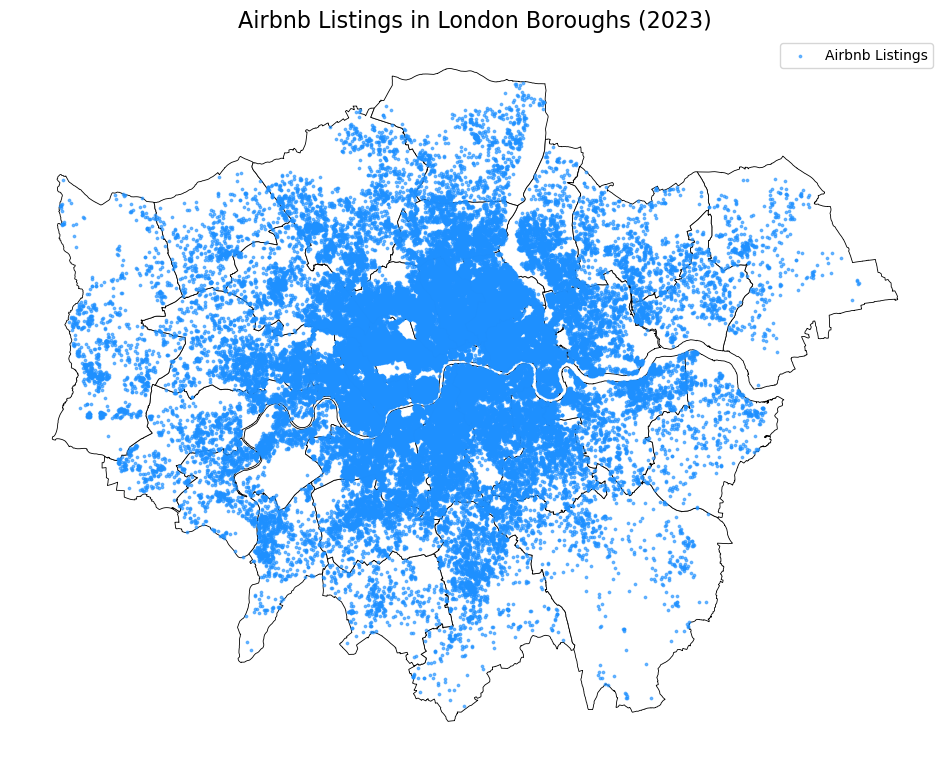

In [4]:
#filtering and plotting dataset for 2023

# Filter for "Entire home/apt"
data_2021 = data_2023[data_2023['room_type'] == 'Entire home/apt']

# Convert Airbnb data to GeoDataFrame
geometry = [Point(xy) for xy in zip(data_2023['longitude'], data_2023['latitude'])]
airbnb_gdf = gpd.GeoDataFrame(data_2023, geometry=geometry, crs="EPSG:4326")

# Reproject Airbnb data to British National Grid (EPSG:27700)
airbnb_gdf = airbnb_gdf.to_crs(epsg=27700)

# Spatial subsetting: Filter Airbnb listings that intersect boroughs
airbnb_in_boroughs_2023 = airbnb_gdf[airbnb_gdf.geometry.apply(lambda x: boroughs.geometry.intersects(x).any())]

# Plot borough boundaries as the base map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot borough boundaries
boroughs.plot(
    ax=ax,
    color="white",  # Base color for boroughs
    edgecolor="black",  # Boundary color
    linewidth=0.6
)

# Plot Airbnb listings
airbnb_in_boroughs_2023.plot(
    ax=ax,
    markersize=3,  # Size of the points
   color= "#1E90FF",  # Dodger Blue # Airbnb points color
    alpha=0.6,  # Transparency of points
    label="Airbnb Listings"
)

# Add title and legend
ax.set_title("Airbnb Listings in London Boroughs (2023)", fontsize=16)
ax.legend()

# Remove axes
ax.axis("off")

# Show the map
plt.savefig("plot3.png", dpi=300, bbox_inches="tight")
plt.show()

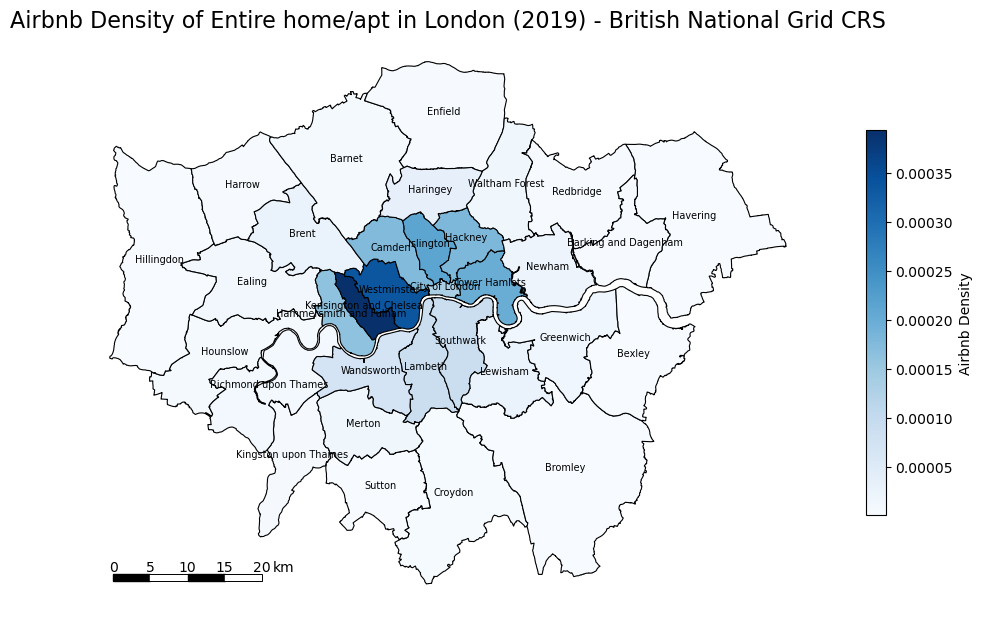

In [5]:
#grouping and plotting densities dataset for 2019

# Count listings per borough
boroughs["listings_count"] = boroughs.geometry.apply(
    lambda borough: airbnb_in_boroughs_2019[airbnb_in_boroughs_2019.geometry.intersects(borough)].shape[0]
)

# Normalize by area to calculate density
boroughs["density"] = boroughs["listings_count"] / boroughs["geometry"].area  # Listings per square meter

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Set the background color to black
ax.set_facecolor('black')

# Plot borough density as a choropleth map

boroughs.plot(
    column="density",
    cmap="Blues",
    linewidth=0.8,
    ax=ax,
    edgecolor="black",
    legend=True,
    legend_kwds={"label": "Airbnb Density", "orientation": "vertical", "shrink": 0.5}
)

# Add borough labels
for idx, row in boroughs.iterrows():
    plt.annotate(
        text=row["NAME"],  # Borough name
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        horizontalalignment="center",
        fontsize=7,
        color="black"
    )

# Add custom scale bar
# Define scale bar position in axis coordinates (fractions of axis size)
scale_bar_start = 0.05  # Starting position on x-axis (fraction of total width)
scale_bar_length = 0.2  # Total length of the scale bar (fraction of total width)
scale_bar_y = 0.05      # y position of the scale bar (fraction of total height)
scale_bar_thickness = 600  # Thickness of the scale bar in meters


# Convert fractions to data coordinates
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()

bar_x_start = x_start + scale_bar_start * (x_end - x_start)
bar_x_end = bar_x_start + scale_bar_length * (x_end - x_start)
bar_y = y_start + scale_bar_y * (y_end - y_start)

# Add alternating rectangles for the scale bar
bar_width = (bar_x_end - bar_x_start) / 4
colors = ['black', 'white', 'black', 'white']
for i in range(4):
    rect = patches.Rectangle(
        (bar_x_start + i * bar_width, bar_y),
        bar_width,
        600,  # Height of the scale bar in meters (adjust as needed)
        color=colors[i],
        transform=ax.transData,
        clip_on=False
    )
    ax.add_patch(rect)

# Add scale labels
label_offsets = [0, bar_width, 2 * bar_width, 3 * bar_width, 4 * bar_width]
for i, offset in enumerate(label_offsets):
    plt.text(
        bar_x_start + offset,
        bar_y + 900,  # Slightly below the bar
        f"{i * 5}",  # Labels: 0, 5, 10, 15, 20
        fontsize=10,
        color="black",
        ha="center",
        transform=ax.transData
    )

# Add scale bar border
scale_bar_border = patches.Rectangle(
    (bar_x_start, bar_y),  # Bottom-left corner of the border
    bar_x_end - bar_x_start,  # Width of the border
    scale_bar_thickness,  # Height of the border
    linewidth=0.7,  # Border thickness
    edgecolor="black",
    facecolor="none",  # Transparent fill
    transform=ax.transData,
    clip_on=False
)
ax.add_patch(scale_bar_border)

# Add "km" label
plt.text(
    bar_x_start + 4.3 * bar_width,
    bar_y + 900,
    "km",
    fontsize=10,
    color="black",
    ha="left",
    transform=ax.transData
)


# Customize the map
ax.set_title("Airbnb Density of Entire home/apt in London (2019) - British National Grid CRS", fontsize=16)
ax.axis("off")  # Turn off axis

# Save the plot
plt.savefig("plot4.png", dpi=300, bbox_inches="tight")
plt.show()


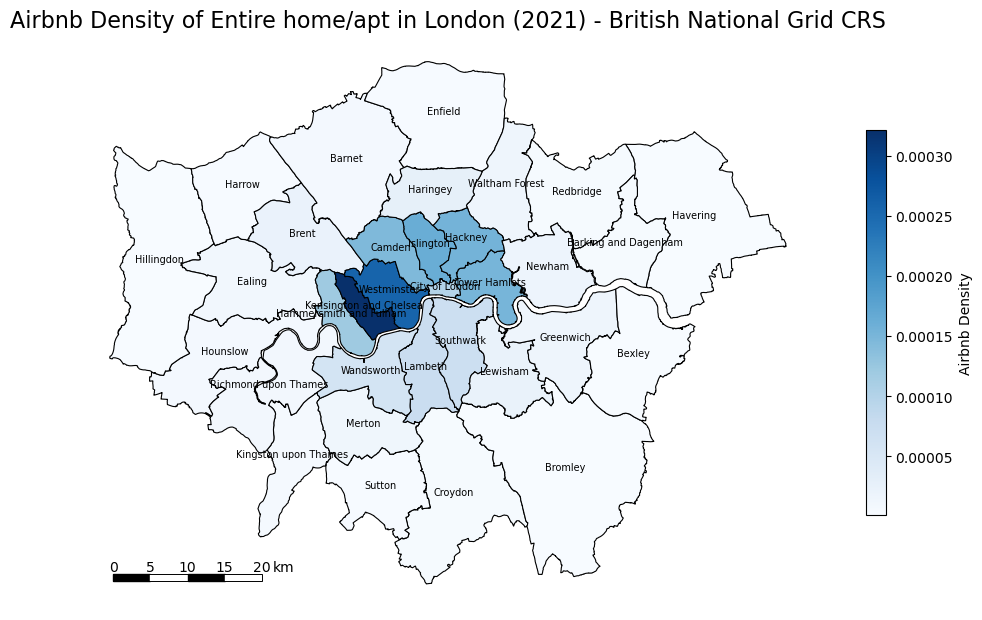

In [6]:
#grouping and plotting densities dataset for 2021

# Count listings per borough
boroughs["listings_count"] = boroughs.geometry.apply(
    lambda borough: airbnb_in_boroughs_2021[airbnb_in_boroughs_2021.geometry.intersects(borough)].shape[0]
)

# Normalize by area to calculate density
boroughs["density"] = boroughs["listings_count"] / boroughs["geometry"].area  # Listings per square meter


# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Set the background color to black
ax.set_facecolor('black')

# Plot borough density as a choropleth map

boroughs.plot(
    column="density",
    cmap="Blues",
    linewidth=0.8,
    ax=ax,
    edgecolor="black",
    legend=True,
    legend_kwds={"label": "Airbnb Density", "orientation": "vertical", "shrink": 0.5}
)

# Add borough labels
for idx, row in boroughs.iterrows():
    plt.annotate(
        text=row["NAME"],  # Borough name
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        horizontalalignment="center",
        fontsize=7,
        color="black"
    )

# Add custom scale bar
# Define scale bar position in axis coordinates (fractions of axis size)
scale_bar_start = 0.05  # Starting position on x-axis (fraction of total width)
scale_bar_length = 0.2  # Total length of the scale bar (fraction of total width)
scale_bar_y = 0.05      # y position of the scale bar (fraction of total height)
scale_bar_thickness = 600  # Thickness of the scale bar in meters


# Convert fractions to data coordinates
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()

bar_x_start = x_start + scale_bar_start * (x_end - x_start)
bar_x_end = bar_x_start + scale_bar_length * (x_end - x_start)
bar_y = y_start + scale_bar_y * (y_end - y_start)

# Add alternating rectangles for the scale bar
bar_width = (bar_x_end - bar_x_start) / 4
colors = ['black', 'white', 'black', 'white']
for i in range(4):
    rect = patches.Rectangle(
        (bar_x_start + i * bar_width, bar_y),
        bar_width,
        600,  # Height of the scale bar in meters (adjust as needed)
        color=colors[i],
        transform=ax.transData,
        clip_on=False
    )
    ax.add_patch(rect)

# Add scale labels
label_offsets = [0, bar_width, 2 * bar_width, 3 * bar_width, 4 * bar_width]
for i, offset in enumerate(label_offsets):
    plt.text(
        bar_x_start + offset,
        bar_y + 900,  # Slightly below the bar
        f"{i * 5}",  # Labels: 0, 5, 10, 15, 20
        fontsize=10,
        color="black",
        ha="center",
        transform=ax.transData
    )

# Add scale bar border
scale_bar_border = patches.Rectangle(
    (bar_x_start, bar_y),  # Bottom-left corner of the border
    bar_x_end - bar_x_start,  # Width of the border
    scale_bar_thickness,  # Height of the border
    linewidth=0.7,  # Border thickness
    edgecolor="black",
    facecolor="none",  # Transparent fill
    transform=ax.transData,
    clip_on=False
)
ax.add_patch(scale_bar_border)

# Add "km" label
plt.text(
    bar_x_start + 4.3 * bar_width,
    bar_y + 900,
    "km",
    fontsize=10,
    color="black",
    ha="left",
    transform=ax.transData
)


# Customize the map
ax.set_title("Airbnb Density of Entire home/apt in London (2021) - British National Grid CRS", fontsize=16)
ax.axis("off")  # Turn off axis

# Save the plot
plt.savefig("plot5.png", dpi=300, bbox_inches="tight")
plt.show()


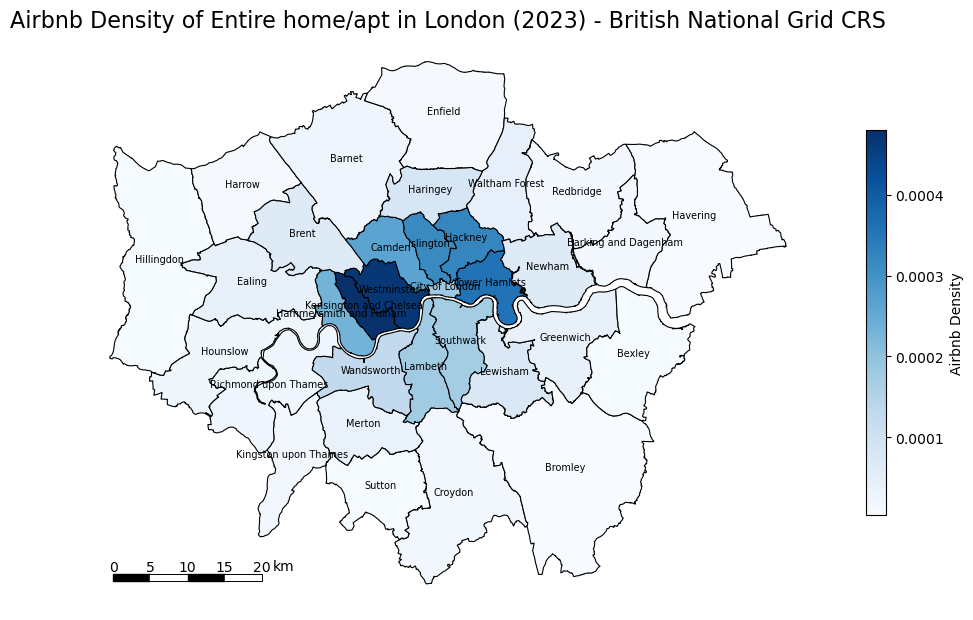

In [7]:
#grouping and plotting densities dataset for 2023

# Count listings per borough
boroughs["listings_count"] = boroughs.geometry.apply(
    lambda borough: airbnb_in_boroughs_2023[airbnb_in_boroughs_2023.geometry.intersects(borough)].shape[0]
)

# Normalize by area to calculate density
boroughs["density"] = boroughs["listings_count"] / boroughs["geometry"].area  # Listings per square meter


# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Set the background color to black
ax.set_facecolor('black')

# Plot borough density as a choropleth map

boroughs.plot(
    column="density",
    cmap="Blues",
    linewidth=0.8,
    ax=ax,
    edgecolor="black",
    legend=True,
    legend_kwds={"label": "Airbnb Density", "orientation": "vertical", "shrink": 0.5}
)

# Add borough labels
for idx, row in boroughs.iterrows():
    plt.annotate(
        text=row["NAME"],  # Borough name
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        horizontalalignment="center",
        fontsize=7,
        color="black"
    )

# Add custom scale bar
# Define scale bar position in axis coordinates (fractions of axis size)
scale_bar_start = 0.05  # Starting position on x-axis (fraction of total width)
scale_bar_length = 0.2  # Total length of the scale bar (fraction of total width)
scale_bar_y = 0.05      # y position of the scale bar (fraction of total height)
scale_bar_thickness = 600  # Thickness of the scale bar in meters


# Convert fractions to data coordinates
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()

bar_x_start = x_start + scale_bar_start * (x_end - x_start)
bar_x_end = bar_x_start + scale_bar_length * (x_end - x_start)
bar_y = y_start + scale_bar_y * (y_end - y_start)

# Add alternating rectangles for the scale bar
bar_width = (bar_x_end - bar_x_start) / 4
colors = ['black', 'white', 'black', 'white']
for i in range(4):
    rect = patches.Rectangle(
        (bar_x_start + i * bar_width, bar_y),
        bar_width,
        600,  # Height of the scale bar in meters (adjust as needed)
        color=colors[i],
        transform=ax.transData,
        clip_on=False
    )
    ax.add_patch(rect)

# Add scale labels
label_offsets = [0, bar_width, 2 * bar_width, 3 * bar_width, 4 * bar_width]
for i, offset in enumerate(label_offsets):
    plt.text(
        bar_x_start + offset,
        bar_y + 900,  # Slightly below the bar
        f"{i * 5}",  # Labels: 0, 5, 10, 15, 20
        fontsize=10,
        color="black",
        ha="center",
        transform=ax.transData
    )

# Add scale bar border
scale_bar_border = patches.Rectangle(
    (bar_x_start, bar_y),  # Bottom-left corner of the border
    bar_x_end - bar_x_start,  # Width of the border
    scale_bar_thickness,  # Height of the border
    linewidth=0.7,  # Border thickness
    edgecolor="black",
    facecolor="none",  # Transparent fill
    transform=ax.transData,
    clip_on=False
)
ax.add_patch(scale_bar_border)

# Add "km" label
plt.text(
    bar_x_start + 4.3 * bar_width,
    bar_y + 950,
    "km",
    fontsize=10,
    color="black",
    ha="left",
    transform=ax.transData
)


# Customize the map
ax.set_title("Airbnb Density of Entire home/apt in London (2023) - British National Grid CRS", fontsize=16)
ax.axis("off")  # Turn off axis

# Save the plot
plt.savefig("plot6.png", dpi=300, bbox_inches="tight")
plt.show()


In [11]:
from PIL import Image

# Paths to your saved plots (replace with actual file paths)
plot_paths = [
    "plot1.png",
    "plot2.png",
    "plot3.png",
    "plot4.png",
    "plot5.png",
    "plot6.png"
]

# Open all images
images = [Image.open(plot) for plot in plot_paths]

# Define collage grid dimensions (3 rows x 3 columns)
rows, cols = 3, 3
thumbnail_size = (800, 500)  # Resize each image to this size

# Create a blank canvas for the collage
collage_width = cols * thumbnail_size[0]
collage_height = rows * thumbnail_size[1]
collage = Image.new("RGB", (collage_width, collage_height), "white")

# Paste each image into the collage
for index, image in enumerate(images):
    image.thumbnail(thumbnail_size)  # Resize each image
    x_offset = (index % cols) * thumbnail_size[0]  # X-coordinate
    y_offset = (index // cols) * thumbnail_size[1]  # Y-coordinate
    collage.paste(image, (x_offset, y_offset))

# Save the final collage
collage.save("Merged_Collage.png")
collage.show()
